**Arbol de Desicion**

Ejemplo para la clasificacion de la potabilidad del agua.



In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

**import pandas as pd:**
una biblioteca para manipulación y análisis de datos estructurados

**from sklearn.tree import DecisionTreeClassifier:**
 clasificador de árbol de decisión de la biblioteca scikit-learn para realizar tareas de clasificación

**from sklearn.tree import plot_tree:**
Permite visualizar el árbol de decisión entrenado en forma gráfica

**import matplotlib.pyplot as plt:**
Importa Matplotlib, una biblioteca para generar gráficos y visualizaciones

**import seaborn as sns:**
Importa Seaborn, una biblioteca para hacer gráficos estadísticos más estilizados y detallados

**from sklearn.metrics import confusion_matrix, classification_report:**

**confusion_matrix**: Calcula una matriz de confusión para evaluar el rendimiento del modelo de clasificacion

**classification_report:** Genera un informe detallado con métricas como precisión, recall, y F1-score para cada clase

In [69]:
df = pd.read_csv('./water_potability.csv')
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3000,6.931244,207.588953,24359.470414,7.222004,313.819713,477.062975,16.495092,75.041914,4.897957,0
2271,8.388322,256.234007,16795.820484,4.143519,NaN,333.946197,10.821321,55.190219,3.854772,0
140,8.594416,270.022706,15791.675351,5.912691,NaN,672.556999,20.184051,54.961285,3.568992,0
844,9.085637,238.221968,9001.658753,9.820231,325.104847,381.346582,19.195740,98.490819,2.544020,0
2513,9.831402,263.632722,13345.369098,6.566929,295.774218,462.439737,12.002323,76.021367,3.311808,0
2076,8.469537,128.620079,15273.049287,10.725524,NaN,553.346260,16.930868,69.736688,4.149553,0
2124,5.098967,197.142637,21682.754771,7.755905,292.251426,424.666112,10.927590,51.220960,4.333667,0
2955,NaN,202.614372,31606.348826,6.464581,NaN,380.974672,13.460449,67.059118,4.775121,0
1716,7.476408,246.184719,27109.895609,9.791961,341.163631,339.729988,16.217680,77.603021,3.478194,0
1573,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1


**df = pd.read_csv('./water_potability.csv'):**

Carga un archivo CSV llamado water_potability.csv en un DataFrame llamado df utilizando Pandas


**df.sample(10):**

Muestra 10 filas aleatorias del DataFrame df

Esto es útil para inspeccionar rápidamente los datos cargados y entender su estructura

In [70]:
df=df.dropna()
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
25,6.514415,198.767351,21218.702871,8.670937,323.596349,413.290450,14.900000,79.847843,5.200885,0
677,9.107330,202.514711,24678.329289,5.575906,334.717335,467.110762,12.937329,46.935252,4.492140,1
2893,5.660736,232.749854,16488.017513,6.262933,294.210317,385.748053,18.875941,76.982658,5.016188,0
279,6.286807,258.300052,13777.376191,7.483258,328.680650,563.434775,16.460837,73.516654,4.104863,1
1402,7.813068,183.697480,9812.122463,7.607639,400.373526,539.610797,12.348083,90.390277,4.713719,0
1300,7.086877,192.387368,25524.823470,7.354035,322.740031,548.917718,14.524408,64.124391,3.992848,0
323,5.564342,256.208830,11245.735767,7.212254,329.338366,369.555513,15.640053,51.150344,2.285988,1
380,6.887414,223.603058,29189.136721,10.514466,253.830552,386.622862,11.312294,67.916183,4.564188,1
2063,9.250492,184.442011,22749.178352,7.401663,375.008324,436.493762,15.402961,44.788970,3.996339,0
2345,7.617014,214.404363,29818.095042,6.508853,298.351850,494.945537,13.310224,70.048007,3.800553,1


**df = df.dropna():**

Elimina todas las filas que contienen valores nulos (NaN) en el DataFrame df
Esto limpia los datos asegurando que no haya valores faltantes antes de procesarlos

**df.sample(10):**

Muestra 10 filas aleatorias del DataFrame limpio (df), después de haber eliminado las filas con valores nulo

In [71]:
df = pd.get_dummies(data=df, drop_first=True)

**pd.get_dummies(data=df, drop_first=True):**

Convierte las variables categóricas del DataFrame df en variabels dummy (indicadoras o binarias).

Cada categoría se transforma en una nueva columna con valores 0 o 1, indicando su presencia o ausencia

**drop_first=True:** Elimina una de las categorías para evitar multicolinealidad (dependencia lineal entre las columnas) cuando se usa en modelos como la regresión.

**df = ...:**

Reemplaza el DataFrame original con esta nueva version donde las variables categóricas han sido codificada

la idea de este codigo es preprocesar los datos para que las variables categóricas puedan ser utilizadas en modelos de Machine Learning que generalmente requieren datos numericos

In [72]:
explicativas = df.drop(columns='Potability')
objetivo = df.Potability


**explicativas = df.drop(columns='Potability'):**

Crea un nuevo DataFrame llamado explicativas que contiene todas las columnas de df excepto la columna Potability.

Estas columnas representan las variables independientes  que se usarán para entrenar el modelo

**objetivo = df.Potability:**

Extrae la columna Potability del DataFrame df y la guarda en una nueva variable llamada objetivo

Esta columna representa la variable dependiente o etiqueta que el modelo intentará predecir

La idea de esto es separar los datos en:

Variables explicativas (independientes): las entradas o características
Variable objetivo (dependiente): la salida que se quiere predecir

In [87]:
 model = DecisionTreeClassifier(max_depth=5)


**model = DecisionTreeClassifier(max_depth=3):**

Crea un modelo de árbol de decisión con un parámetro que limita la profundidad máxima del árbol a 3 niveles

Este parámetro controla la complejidad del árbol para evitar overfitting (sobreajuste)

**Otros parámetros comunes de DecisionTreeClassifier:**

**criterion:**

Define la métrica para evaluar la calidad de las divisiones en el árbol.
Opciones:

 - "gini" (predeterminado): Usa el índice de Gini.

- "entropy": Usa la ganancia de información basada en entropía.

**splitter:**

Estrategia para dividir los nodos

Opciones:

- "best" (predeterminado): Encuentra la mejor división

- "random": Divide de forma aleatoria

**max_depth:**

Limita la profundidad máxima del árbol. Útil para prevenir sobreajuste

**min_samples_split:**

El número mínimo de muestras requeridas para dividir un nodo

Valor predeterminado: 2. Aumentarlo limita divisiones y reduce la complejidad del árbol

**min_samples_leaf:**

Número mínimo de muestras necesarias en una hoja terminal

Útil para controlar el tamaño de las hojas y reducir el sobreajuste

**max_features:**

El número máximo de características consideradas para dividir un nodo

Opciones:

- Un número entero: Cantidad específica de características

- Un flotante: Proporción de características (e.g., 0.5 usa el 50%).
"auto", "sqrt", "log2": Opciones basadas en funciones predefinidas

**random_state:**

Semilla para la generación de números aleatorios. Útil para garantizar resultados reproducibles

**class_weight:**

Pesos asociados a las clases para manejar problemas con clases desbalanceadas

Ejemplo: {"class_0": 1, "class_1": 2} da más importancia a class_1

**max_leaf_nodes:**

Limita el número máximo de hojas en el árbol

Esto simplifica el modelo y puede mejorar la generalización

**ccp_alpha (Cost-Complexity Pruning):**

Parámetro de poda para simplificar el árbol eliminando ramas poco importantes
Aumentarlo reduce la complejidad del árbol

**Ejmplo de otros parametros**

model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)


In [86]:
model.fit(X=explicativas,y=objetivo)

DecisionTreeClassifier(max_depth=5)

**model.fit(X=explicativas, y=objetivo):**

Entrena el modelo de árbol de decisión (model) utilizando los datos proporcionados:

**X=explicativas:** Las variables independientes (o características) que son los datos de entrada para el modelo

**y=objetivo:** La variable dependiente (o etiqueta) que es el valor que el modelo debe aprender a predecir.

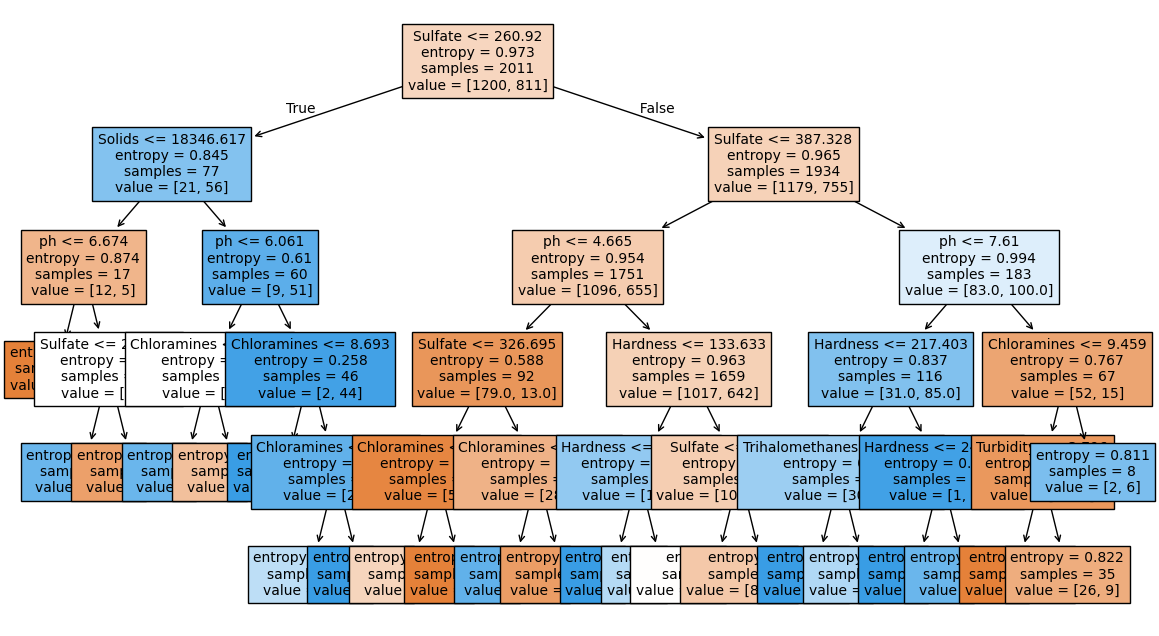

In [75]:
plt.figure(figsize=(14,8))
plot_tree(decision_tree=model,feature_names=explicativas.columns,filled=True, fontsize=10);

**plt.figure(figsize=(14,8)):**

Crea una figura con un tamaño de 14x8 pulgadas para ajustar mejor la visualización del árbol de decisión

**plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, fontsize=10):**

**decision_tree=model:** Especifica el modelo de árbol de decisión que se quiere visualizar.

**feature_names=explicativas.columns:** Etiqueta los nodos del árbol con los nombres de las características utilizadas en el modelo (columnas de las variables explicativas)

**filled=True:** Colorea los nodos según las clases a las que pertenecen o la mayoría de las muestras en cada nodo, facilitando la interpretación

**fontsize=10**: Establece el tamaño de la fuente en el gráfico para que sea legible


La idea es visualizar el árbol de decisión entrenado permitiendo interpretar cómo el modelo divide los datos y qué características son más importantes en cada nivel

In [76]:
a = explicativas.sample()
a

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
402,5.76735,272.472178,15417.932834,7.72886,315.404917,424.461152,15.284268,60.822135,3.89609


**a = explicativas.sample():**

Selecciona una fila aleatoria del DataFrame explicativas y la guarda en la variable a.

Por defecto, sample() devuelve una fila si no se especifica el número de muestras (n).

**a:**

Muestra el contenido de la fila seleccionada aleatoriamente

La idea esextraer una muestra aleatoria de las características lo cual puede ser útil para pruebas individuales, como realizar predicciones con un modelo

In [77]:
model.predict_proba(a)

array([[0.63849432, 0.36150568]])

**model.predict_proba(a):**

Calcula las probabilidades de predicción para cada clase (etiqueta) en el modelo de árbol de decisión, usando la muestra a.

Salida: Una lista con las probabilidades para cada clase.

Por ejemplo, si el modelo tiene dos clases (0 y 1), el resultado puede ser algo como

[[0.6, 0.3]]

Esto indica que el modelo estima una probabilidad del 60% para la clase 0 y del 39% para la clase 1 para la muestra a

La idea es obtener no solo la predicción de clase, sino también las probabilidades asociadas, lo cual es útil en tareas donde queremos conocer el nivel de confianza del modelo para cada decisión

Si se necesita directamente la clase con mayor probabilidad, se usaría model.predict(a).



In [78]:
y_pred = model.predict(explicativas)

**y_pred = model.predict(explicativas):**

Utiliza el modelo de árbol de decisión  entrenado para realizar predicciones sobre el conjunto de datos de entrada explicativas

**explicativas:** Son las características  utilizadas como entrada para el modelo

**y_pred:** Contiene las etiquetas predichas  para cada fila del DataFrame explicativas

la idea es generar predicciones sobre los datos de entrada lo que puede ser usado para evaluar el rendimiento del modelo o para realizar inferencias en nuevos datos.

<Axes: xlabel='Sulfate', ylabel='Count'>

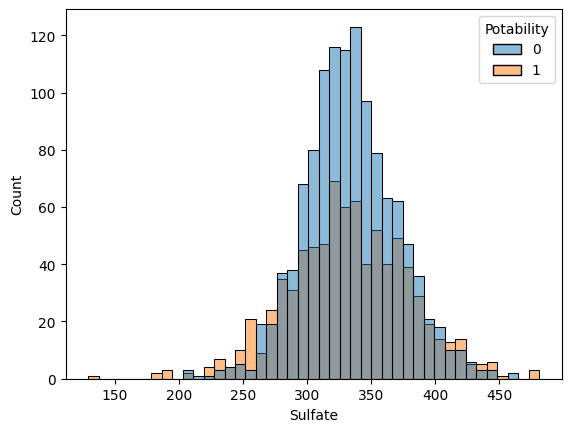

In [79]:
sns.histplot(x=df.Sulfate, hue=df.Potability)

**sns.histplot(x=df.Sulfate, hue=df.Potability):**

se usa Seaborn para generar un histograma que muestra la distribución de la columna Sulfate (eje x) del DataFrame df.

**hue=df.Potability:**

Diferencia las observaciones en el histograma según la variable Potability

Cada clase de Potability (por ejemplo, 0 y 1) se mostrará con colores diferentes, facilitando la comparación.
Propósito:

Visualizar cómo se distribuyen los valores de Sulfate en las diferentes clases de Potability

Ayuda a identificar relaciones o patrones entre la variable explicativa Sulfate y la clase objetivo Potability

Este gráfico es útil para evaluar si ciertas características podrían ser discriminatorias para el modelo

El gráfico muestra la distribución de la concentración de sulfatos (Sulfate) en el agua, diferenciada por la potabilidad (Potability):

La mayor parte del agua no potable (Potability = 0) tiene concentraciones de sulfatos entre 300 y 350

El agua potable (Potability = 1) está menos representada y parece distribuirse de manera similar, pero con menos casos en general.

esot no dice que no parece haber una clara separación entre las concentraciones de sulfatos para diferenciar agua potable y no potable, pero podrían influir otros factores

In [80]:
df['pred'] = y_pred

**df['pred'] = y_pred:**

Crea una nueva columna en el DataFrame df llamada pred

Asigna las predicciones generadas por el modelo (y_pred) a esta columna

La idea es agregar las predicciones del modelo al DataFrame original para poder compararlas directamente con los valores reales de la columna objetivo  o realizar análisis adicionales.

In [81]:
df.sample(10)[['Potability','pred']]

,Potability,pred
339,1,0
1804,0,0
163,0,0
501,0,0
2052,0,0
1897,1,1
379,1,1
2050,0,0
1980,1,0
1630,1,0


**df.sample(10):**

Selecciona 10 filas aleatorias del DataFrame df

**[['Potability', 'pred']]:**

Filtra las columnas Potability (valor real) y pred (valor predicho) para mostrar únicamente estas dos

vamos a comparar de manera directa los valores reales (Potability) con las predicciones del modelo (pred) en una muestra aleatoria de 10 filas

Esto es útil para verificar cómo de acertadas son las predicciones del modelo en casos concretos

In [82]:

(df['Potability']==df['pred']).sum()

1326

In [83]:
(df['Potability']==df['pred']).mean()

0.6593734460467429

**(df['Potability'] == df['pred']):**

Compara los valores de la columna real Potability con las predicciones pred

Devuelve un arreglo booleano donde:

- True indica que la predicción coincide con el valor real.
- False indica que no coinciden

**.sum():**

Cuenta el número de True el número total de casos en los que las predicciones coinciden con los valores reales

copn esto podemos ver cuántas predicciones del modelo son correctas.
Esto permite calcular el desempeño básico del modelo

Matriz de Confusión:
[[1149   51]
 [ 634  177]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.64      0.96      0.77      1200
           1       0.78      0.22      0.34       811

    accuracy                           0.66      2011
   macro avg       0.71      0.59      0.56      2011
weighted avg       0.70      0.66      0.60      2011



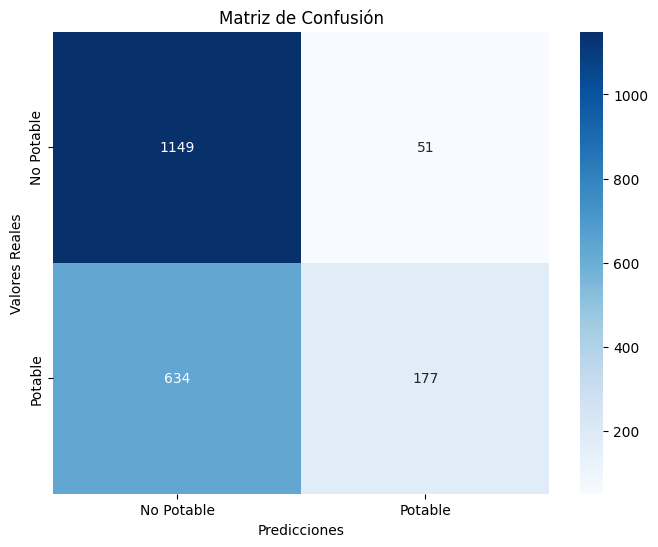

In [84]:

# matriz de confusión
conf_matrix = confusion_matrix(df['Potability'], df['pred'])

# ver la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# ver un reporte de clasificación
report = classification_report(df['Potability'], df['pred'])
print("\nReporte de Clasificación:")
print(report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Potable', 'Potable'], yticklabels=['No Potable', 'Potable'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

**conf_matrix = confusion_matrix(df['Potability'], df['pred'])**

Usamos la matriz de confusion para ver los valores reales (Potability) contra las predicciones (pred)

La matriz de confusión es una tabla que muestra:

- Verdaderos Positivos (VP): Correctamente clasificados como "Potable"
- Verdaderos Negativos (VN): Correctamente clasificados como "No Potable"
- Falsos Positivos (FP): Erróneamente clasificados como "Potable"
- Falsos Negativos (FN): Erróneamente clasificados como "No Potable"


**print("Matriz de Confusión:")**

**print(conf_matrix)**

Muestra la matriz de confusión en texto para revisar los conteos de clasificaciones correctas e incorrectas

**report = classification_report(df['Potability'], df['pred'])**

**print("\nReporte de Clasificación:")**

**print(report)**

Usa classification_report para generar métricas detalladas:

- Precisión (Precision): Porcentaje de predicciones correctas para cada clase
- Recall (Sensibilidad): Qué tan bien se identifican los casos reales de cada clase
- F1-Score: Promedio ponderado de precisión y recall
- Soporte: Cantidad de datos en cada clase

**plt.figure(figsize=(8, 6))**

**sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Potable', 'Potable'], yticklabels=['No Potable', 'Potable'])**

**plt.xlabel('Predicciones')**

**plt.ylabel('Valores Reales')**

**plt.title('Matriz de Confusión')**

**plt.show()**

**sns.heatmap:**

Visualiza la matriz de confusión como un gráfico con colores (azul en este caso).

- **annot=True:** Muestra los valores numéricos en cada celda
- **fmt='d':** Formato numérico entero para las celdas

Etiquetas en los ejes (xticklabels y yticklabels) para indicar las clases

**plt:** Personaliza el gráfico (título, etiquetas) y lo muestra

La idea es evaluar el rendimiento del modelo de clasificación mostrando:

La matriz de confusión (numérica y visual)

Métricas detalladas del modelo para cada clase

Ayuda a identificar errores y posibles ajustes en el modelo
